# 位相キックバック



## 目次

1. [CNOTゲートの探索](#exploring-cnot)
2. [位相キックバック](#kickback)     
    2.1 [CNOT回路の等価性の説明](#explaining-identity)     
    2.2 [Tゲートでのキックバック](#kickback-t-gate)    

## 1. Exploring the CNOT-Gate <a id="exploring-cnot"></a>

前のセクションでは、CNOTゲートを使用したいくつかの非常に基本的な結果を確認しました。ここでは、さらに興味深い結果をいくつか見ていきます。

制御量子ビットを状態$|+\rangle$におくことで、2つの量子ビットをエンタングルできました：

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

しかし、2番目の量子ビットも重ね合わせの状態にするとどうなるでしょうか？ 

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

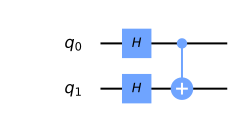

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

上の回路について、CNOTを作用させます：

$$ |{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$

CNOTは$|01\rangle$と$|11\rangle$の振幅をスワップするため、結果に変わりが無いことが分かります：

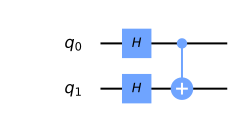

<IPython.core.display.Latex object>

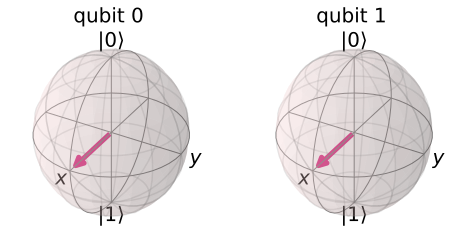

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())  # `display` is a command for Jupyter notebooks
                    # similar to `print`, but for rich content

# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

標的量子ビットの状態を$|-\rangle$にすると、マイナスの位相をもちます：

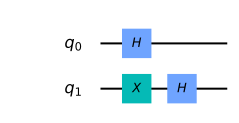

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

この状態はこちらです：

$$ |{-}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$

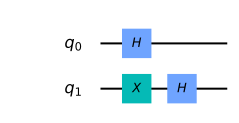

<IPython.core.display.Latex object>

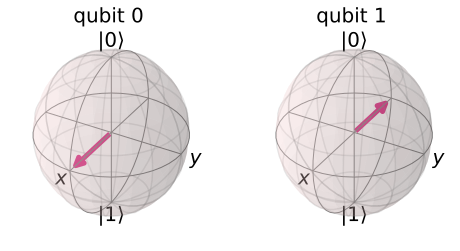

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw())
# See the result
qc1 = qc.copy()
qc1.save_statevector()
final_state = svsim.run(qc1).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

CNOTをこの状態に作用させる場合、$|01\rangle$ と $|11\rangle$ の振幅がスワップされて、次の状態になります：

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \\
\text{CNOT}|{-}{+}\rangle & = |{-}{-}\rangle
\end{aligned}
$$


これは興味深いものです。なぜなら、*標的*量子ビットの状態を変更せずに、*制御*量子ビットの状態に影響を与えるからです。

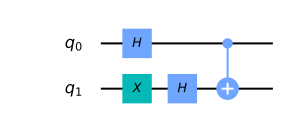

<IPython.core.display.Latex object>

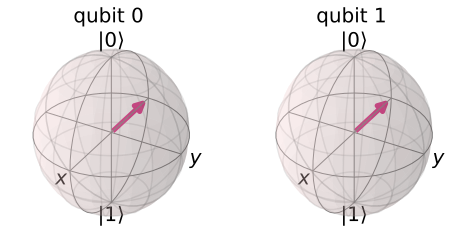

In [6]:
qc.cx(0,1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

Hゲートが$|{+}\rangle \rightarrow |0\rangle$ と $|{-}\rangle \rightarrow |1\rangle$ の変換をすることを覚えていたら、CNOTをHゲートでラップすると、向きが反対のCNOTと同じ作用になることが分かると思います。

![cnot_identity](images/identities_1.svg)

これは、Qiskitのユニタリーシミュレーターを使って確認できます：

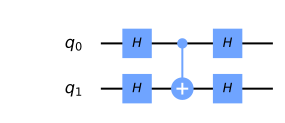

<IPython.core.display.Math object>

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 
# `display` is an IPython tool, remove if it causes an error

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

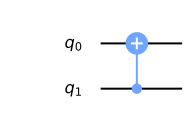

<IPython.core.display.Math object>

In [8]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

この等価性は*位相キックバック*の一例であり、説明は次のセクションに続きます。。。

## 2. 位相キックバック <a id="kickback"></a>

### 2.1 CNOT回路の等価性の説明 <a id="explaining-identity"></a>
前のセクションでこの等価性を確認しました：

![cnot_identity](images/identities_1.svg)

これは*キックバック*（または*位相キックバック*）の一例であり、ほとんどすべての量子アルゴリズムで使用されているほど、とても重要です。キックバックは、ゲートによって量子ビットに追加された固有値が、制御操作によって別の量子ビットに「キックバック」されることです。例えば、$|{-}\rangle$ の量子ビットにXゲートを実行すると、位相 $-1$が得られます：

$$
X|{-}\rangle = -|{-}\rangle
$$

制御量子ビットが$|0\rangle$ または$|1\rangle$のいずれかにある場合、この位相は状態全体に影響しますが、グローバル位相であるため、観測されません：

$$
\begin{aligned}
\text{CNOT}|{-}0\rangle & = |{-}\rangle \otimes |0\rangle \\
                        & = |{-}0\rangle \\
                        \quad & \\
\text{CNOT}|{-}1\rangle & = X|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}1\rangle \\
\end{aligned}
$$

興味深い効果は、制御量子ビットが重ね合わせの場合です。$|1\rangle$の方向にある制御量子ビットの成分は、対応する標的量子ビットにこの位相因子を適用します。これにより、制御量子ビットに相対位相が追加されます：

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{\sqrt{2}}(\text{CNOT}|{-}0\rangle + \text{CNOT}|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle + X|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle -|{-}1\rangle) \\
\end{aligned}
$$

これは、2つの分離可能な量子ビット状態として書き込むことができます：

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = |{-}\rangle \otimes \tfrac{1}{\sqrt{2}}(|{0}\rangle - |1\rangle )\\
                           & = |{-}{-}\rangle \\
\end{aligned}
$$

HゲートでCNOTをラップすると、量子ビットが計算基底から$(|+\rangle, |-\rangle)$ 基底に変換され、この効果がわかります。一部のハードウェアは2つの特定の量子ビット間の一方向のCNOTしか許されないため、この等価性はハードウェアレベルで非常に有益です。この等価性を使ってこのハードウェアの問題を克服し、双方向のCNOTを実現できるようになります。

### 2.2 Tゲートでのキックバック <a id="kickback-t-gate"></a>

別の制御オペレーションである、制御Tゲートを見てみましょう：


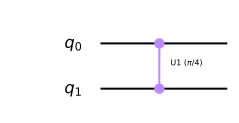

In [9]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw()

Tゲートは、以下の行列です：

$$
\text{T} = 
\begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}\\
\end{bmatrix}
$$

そして、制御Tゲートは以下の行列です：

$$
\text{Controlled-T} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\pi/4}\\
\end{bmatrix}
$$

これはQiskitのユニタリーシミュレーターで確認できます：

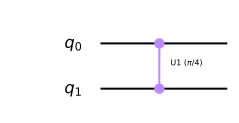

<IPython.core.display.Math object>

In [10]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

より一般的には、次の規則を使用して、制御Uオペレーションの行列を見つけることができます：

$$
\begin{aligned}
\text{U} & = 
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-U} & = 
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned}
$$

または、Qiskitの量子ビット配列では：

$$
\text{Controlled-U} =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11}\\
\end{bmatrix}
$$


状態 $|1\rangle$ の量子ビットにTゲートを適用すると、この量子ビットに $e^{i\pi/4}$ の位相が追加されます：

$$
T|1\rangle = e^{i\pi/4}|1\rangle
$$

これは*グローバル位相*であり、観測することはできませんが、$|{+}\rangle$状態の別の量子ビットを使用してこの操作を制御すると、位相はグローバルではなく相対になり、制御ビットの相対位相が変化します：

$$
\begin{aligned}
|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
& \\
\text{Controlled-T}|1{+}\rangle & = \tfrac{1}{\sqrt{2}}(|10\rangle + e^{i\pi/4}|11\rangle) \\
& \\
& = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\pi/4}|1\rangle)
\end{aligned}
$$

これは、標的量子ビットを変化させずに、制御量子ビットをブロッホ球のZ軸回りに回転させる作用があります。これをQiskitで見てみましょう：

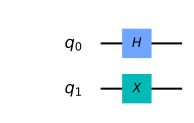

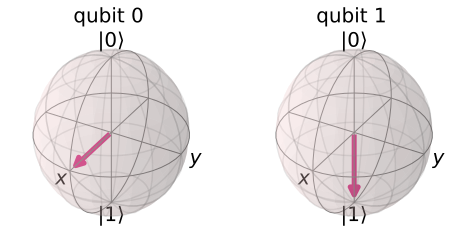

In [11]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

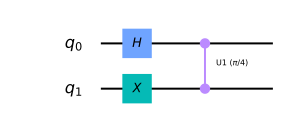

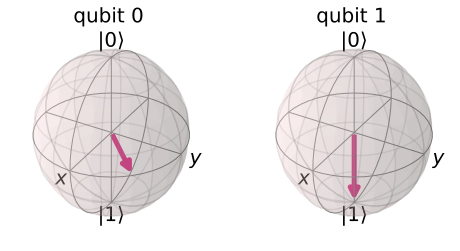

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

予想していた通り、右側の量子ビット（ブロッホ球では左の図）がブロッホ球のZ軸回りに$\pi/4$回転したことが分かります。この動作を調べるてみると、Qiskitが制御Z回転ゲートをこの対称的な表記（制御ビットと標的ビットではなく2つの制御ビット）で描画する理由が明らかになるかもしれません。制御Zゲートには、制御や標的量子ビットの区別はありません。

<img src="images/pkb_z_equiv.svg">

### 練習問題:

<ol>
<li>（下の回路に示すように）標的量子ビット（q1）が$|0\rangle$の状態にある場合、制御量子ビット（q0）の状態はどのような結果になりますか？ Qiskitで回路を作成して、答えを確認してみましょう。

<img src="images/pkb_ex1.svg">
</li>
<li>（下の回路に示すように）標的量子ビット（q1）が$|1\rangle$の状態で、回路が制御Tではなく制御Sdgゲートを使用した場合、制御量子ビット（q0）はどうなりますか？

<img src="images/pkb_ex2.svg">
</li>

<li>（下の回路が示すように）制御量子ビット（q0）の制御Tを適用する前の状態が$|{+}\rangle$ではなく、$|1\rangle$の状態にあった場合、制御量子ビット（q0）はどうなりますか？

<img src="images/pkb_ex3.svg">
</li>
</ol>

In [13]:
import qiskit.tools.jupyter
%qiskit_version_table

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.1',
 'qiskit-aqua': '0.7.1',
 'qiskit': '0.19.2'}